In [4]:
using PyPlot; plt = PyPlot
using LinearAlgebra
include("../src/separable.jl");
using Main.Separable

In [17]:
noise_levels = exp10.(range(-3, stop=3, length=50))
n_tests = 100
# thresh = 1e-2
;

### Fit data

In [18]:
scores = zeros(length(noise_levels))
N, T, K, L = 100, 250, 3, 5


for j in 1:n_tests
    data, tW, tH = gen_sep_data(N, T, K, L)

    for i in 1:length(noise_levels)
        noisy_data = data + (noise_levels[i] * rand(N, T))
        
        estW, estH = fit_conv_separable(noisy_data, K, L,
                                        thresh=max(0.25*N - noise_levels[i], 0),
                                        verbose=false)
        perm = permute_factors(tH, estH)
        
        scr = cos_score(estH[perm, :], tH)
        scores[i] += scr

    end
end

scores = scores / n_tests
;

### Generate figures

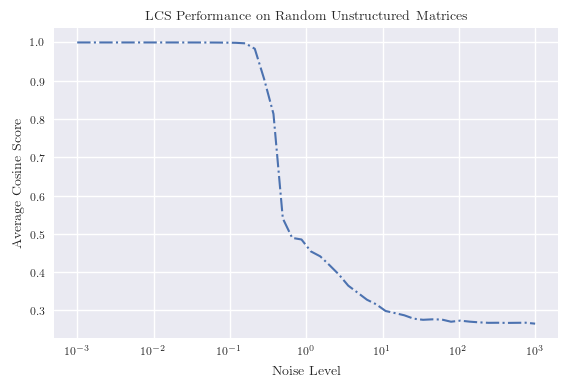

In [19]:
# PLOT SETTINGS
include("./sep_plot_settings.jl")

plt.figure(figsize=set_size(doc_textwidth))
plt.plot(noise_levels, scores)
plt.xscale("log")
plt.xlabel("Noise Level")
plt.ylabel("Average Cosine Score")
plt.title("LCS Performance on Random Unstructured Matrices")
plt.show()

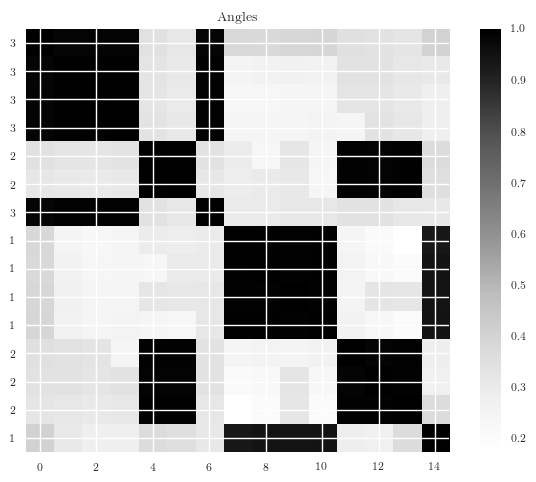

0.9913382222216853

In [130]:
noise_max = 2e-1

data, tW, tH = gen_sep_data(N, T, K, L)
noisy_data = data + (noise_max * rand(N, T))

W, H = fit_conv_separable(noisy_data, K, L, thresh=max(0.25*N - noise_max, 0), verbose=true)

perm = permute_factors(tH, H)
cos_score(H[perm, :], tH)